In [1]:
import numpy as np
import pandas as pd
import os
import csv
from random import random, sample, seed
import matplotlib.pyplot as plt
#!pip install opencv-python
#!apt update && apt install -y libsm6 libxext6
#import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('dataset1.csv')

In [3]:
df.head()

,id,title,hour,minute,dayofweek,dayofyear,score
0,9gx68l,"Reddit, how would you feel about a law that ba...",14,1,2,261,149070
1,9hef7a,"In a video game, if you come across an empty r...",7,17,4,263,83296
2,9icx7a,What is a website that everyone should know ab...,19,16,0,266,82665
3,9jlras,"What could the U.S.A. have spent $1,000,000,00...",6,17,5,271,74998
4,9fbka2,If a genie grants you the opportunity to ejacu...,16,47,3,255,69915


In [4]:
df.describe()

,hour,minute,dayofweek,dayofyear,score
count,503938.000000,503938.000000,503938.000000,503938.000000,503938.000000
mean,12.781120,29.562274,2.911717,274.629046,25.797312
std,6.602338,17.317721,1.969925,17.578185,815.115481
min,0.000000,0.000000,0.000000,243.000000,0.000000
25%,8.000000,15.000000,1.000000,260.000000,1.000000
50%,13.000000,30.000000,3.000000,275.000000,1.000000
75%,18.000000,45.000000,5.000000,290.000000,3.000000
max,23.000000,59.000000,6.000000,304.000000,149070.000000


In [5]:
df.drop(df.tail(86218).index,inplace=True) # to balance the data

In [6]:
df.describe()

,hour,minute,dayofweek,dayofyear,score
count,417720.000000,417720.000000,417720.000000,417720.000000,417720.000000
mean,12.764002,29.586678,2.904345,275.080355,31.077978
std,6.631318,17.315818,1.987624,17.630589,895.201870
min,0.000000,0.000000,0.000000,243.000000,1.000000
25%,8.000000,15.000000,1.000000,260.000000,1.000000
50%,13.000000,30.000000,3.000000,276.000000,1.500000
75%,18.000000,45.000000,5.000000,290.000000,3.000000
max,23.000000,59.000000,6.000000,304.000000,149070.000000


In [7]:
s_titles = df['title'].values.tolist()
s_hours = df['hour'].values.tolist()
s_minutes = df['minute'].values.tolist()
s_dayofweeks = df['dayofweek'].values.tolist()
s_dayofyears = df['dayofyear'].values.tolist()
s_is_top_submission = df['score'].values.tolist()
split_score = s_is_top_submission[np.int(len(s_is_top_submission)/2)]
poppular_count = 0
unpoppular_count = 0

for i in range(0,len(s_is_top_submission)):
  if s_is_top_submission[i] > split_score:
    s_is_top_submission[i] = 1
    poppular_count += 1
  else:
    s_is_top_submission[i] = 0
    unpoppular_count += 1
    
print(poppular_count)
print(unpoppular_count)
print(split_score)
    
titles = np.array(s_titles)
hours = np.array(s_hours, dtype=int)
minutes = np.array(s_minutes, dtype=int)
dayofweeks = np.array(s_dayofweeks, dtype=int)
dayofyears = np.array(s_dayofyears, dtype=int)
is_top_submission = np.array(s_is_top_submission, dtype=int)

208860
208860
1


In [8]:
print(titles[0:2])
print(titles.shape)
print(hours[0:2])
print(minutes[0:2])
print(dayofweeks[0:2])
print(dayofyears[0:2])
print(is_top_submission[0:2])

['Reddit, how would you feel about a law that bans radio stations from playing commercials with honking/beeping/siren noises in them?'
 'In a video game, if you come across an empty room with a health pack, extra ammo, and a save point, you know some serious shit is about to go down. What is the real-life equivalent of this?']
(417720,)
[14  7]
[ 1 17]
[2 4]
[261 263]
[1 1]


In [9]:
df.hour.replace((0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23),('12AM','1AM','2AM','3AM','4AM','5AM','6AM','7AM','8AM','9AM','10AM','11AM','12PM','1PM','2PM','3PM','4PM','5PM','6PM','7PM','8PM','9PM','10PM','11PM'), inplace=True)
df.dayofweek.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)

In [10]:
df.pivot_table(values='score',index='dayofweek',columns='hour')

hour,10AM,10PM,11AM,11PM,12AM,12PM,1AM,1PM,2AM,2PM,...,5AM,5PM,6AM,6PM,7AM,7PM,8AM,8PM,9AM,9PM
dayofweek,,,,,,,,,,,,,,,,,,,,,
Friday,27.000414,17.510413,33.022122,48.430086,4.339130,13.839130,3.975820,25.382689,5.123525,61.797546,...,48.130548,11.468891,92.319911,9.625350,44.829936,16.232029,141.431193,17.195225,66.979431,22.713819
Monday,24.590455,48.054708,32.188673,7.463824,41.855678,16.531417,5.794183,26.324279,4.949406,15.903814,...,70.026178,42.171075,41.796671,14.009367,112.372468,22.861520,59.061109,30.169889,80.014534,6.106330
Saturday,47.948178,35.156058,19.029001,8.080094,24.877390,23.157054,16.457820,25.911359,18.868226,9.248059,...,76.318087,44.885804,37.379005,62.526106,51.128028,8.385023,38.890066,15.839735,91.906425,6.363569
Sunday,75.654712,20.382033,78.948221,10.665739,17.918548,36.405738,7.403445,19.989590,38.455506,6.410172,...,49.168360,24.499060,38.069767,18.471493,59.779293,33.531784,78.793269,29.018116,47.337694,7.776167
Thursday,61.354674,54.394227,40.235473,9.708942,42.058123,45.430253,8.269600,14.617207,13.471236,18.680889,...,10.548188,18.425100,78.633929,13.932442,59.647458,16.718547,124.621908,44.711617,67.332205,23.579960
Tuesday,36.061802,24.712753,34.414496,9.667234,48.405509,60.969002,8.934772,34.464052,6.505099,51.025359,...,7.362416,7.197643,76.530820,8.787879,51.568648,26.888363,70.605470,25.044556,72.630127,40.112445
Wednesday,49.946662,4.673896,56.728942,20.917352,19.443829,31.376294,10.657275,7.826772,20.312993,26.735130,...,48.180843,4.025392,79.918320,25.226604,60.368981,8.226384,70.657765,3.544440,12.049699,29.558999


In [11]:
from keras.preprocessing import sequence
from keras.preprocessing.text import text_to_word_sequence, Tokenizer

max_features = 40000

word_tokenizer = Tokenizer(max_features)
word_tokenizer.fit_on_texts(titles)

print(str(word_tokenizer.word_counts)[0:100])
print(str(word_tokenizer.word_index)[0:100])
print(len(word_tokenizer.word_counts))   # true word count

Using TensorFlow backend.


OrderedDict([('reddit', 48031), ('how', 54278), ('would', 48132), ('you', 266596), ('feel', 7775), (
{'hofstra': 51520, 'genre’s': 64031, '‘money': 45477, 'seemless': 59499, 'destabilize': 65817, 'filt
69547


In [12]:
titles_tf = word_tokenizer.texts_to_sequences(titles)
print(titles_tf[0])

[20, 16, 19, 1, 99, 33, 5, 509, 12, 4781, 1761, 4422, 46, 612, 2701, 25, 13640, 11997, 12471, 5423, 11, 87]


In [13]:
maxlen = 20
titles_tf = sequence.pad_sequences(titles_tf, maxlen=maxlen)
print(titles_tf[0])

[   19     1    99    33     5   509    12  4781  1761  4422    46   612
  2701    25 13640 11997 12471  5423    11    87]


In [14]:
embeddings_path = 'glove.6B.50d.txt'

In [15]:
embedding_vectors = {}

with open(embeddings_path, 'r') as f:
    for line in f:
        line_split = line.strip().split(" ")
        vec = np.array(line_split[1:], dtype=float)
        word = line_split[0]
        embedding_vectors[word] = vec
        
print(embedding_vectors['you'])

[-1.0919e-03  3.3324e-01  3.5743e-01 -5.4041e-01  8.2032e-01 -4.9391e-01
 -3.2588e-01  1.9972e-03 -2.3829e-01  3.5554e-01 -6.0655e-01  9.8932e-01
 -2.1786e-01  1.1236e-01  1.1494e+00  7.3284e-01  5.1182e-01  2.9287e-01
  2.8388e-01 -1.3590e+00 -3.7951e-01  5.0943e-01  7.0710e-01  6.2941e-01
  1.0534e+00 -2.1756e+00 -1.3204e+00  4.0001e-01  1.5741e+00 -1.6600e+00
  3.7721e+00  8.6949e-01 -8.0439e-01  1.8390e-01 -3.4332e-01  1.0714e-02
  2.3969e-01  6.6748e-02  7.0117e-01 -7.3702e-01  2.0877e-01  1.1564e-01
 -1.5190e-01  8.5908e-01  2.2620e-01  1.6519e-01  3.6309e-01 -4.5697e-01
 -4.8969e-02  1.1316e+00]


In [16]:
weights_matrix = np.zeros((max_features + 1, 50))

for word, i in word_tokenizer.word_index.items():

    embedding_vector = embedding_vectors.get(word)
    if embedding_vector is not None and i <= max_features:
        weights_matrix[i] = embedding_vector

# index 0 vector should be all zeroes, index 1 vector should be the same one as above
print(weights_matrix[0:2,:])

[[ 0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00
   0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00
   0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00
   0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00
   0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00
   0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00
   0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00
   0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00
   0.0000e+00  0.0000e+00]
 [-1.0919e-03  3.3324e-01  3.5743e-01 -5.4041e-01  8.2032e-01 -4.9391e-01
  -3.2588e-01  1.9972e-03 -2.3829e-01  3.5554e-01 -6.0655e-01  9.8932e-01
  -2.1786e-01  1.1236e-01  1.1494e+00  7.3284e-01  5.1182e-01  2.9287e-01
   2.8388e-01 -1.3590e+00 -3.7951e-01  5.0943e-01  7.0710e-01  6.2941e-01
   1.0534e+00 -2.1756e+00 -1.3204e+00  4.0001e-01  1.5741e+00 -1.6600e+00
   3.7721e+

In [17]:
dayofyears_tf = dayofyears
print(dayofyears_tf[0:10])

[261 263 266 271 255 300 274 258 271 295]


In [18]:
from keras.models import Input, Model
from keras.layers import Dense, Embedding, GlobalAveragePooling1D, concatenate, Activation
from keras.layers.core import Masking, Dropout, Reshape
from keras.layers.normalization import BatchNormalization

batch_size = 32
embedding_dims = 50
epochs = 50
dropout_rate = 0.2

In [19]:
titles_input = Input(shape=(maxlen,), name='titles_input')
titles_embedding = Embedding(max_features + 1, embedding_dims, weights=[weights_matrix])(titles_input)
titles_pooling = GlobalAveragePooling1D()(titles_embedding)
titles_dropout = Dropout(dropout_rate)(titles_pooling)

In [20]:
aux_output = Dense(1, activation='sigmoid', name='aux_out')(titles_dropout)

In [21]:
meta_embedding_dims = 64

hours_input = Input(shape=(1,), name='hours_input')
hours_embedding = Embedding(24, meta_embedding_dims)(hours_input)
hours_reshape = Reshape((meta_embedding_dims,))(hours_embedding)

dayofweeks_input = Input(shape=(1,), name='dayofweeks_input')
dayofweeks_embedding = Embedding(7, meta_embedding_dims)(dayofweeks_input)
dayofweeks_reshape = Reshape((meta_embedding_dims,))(dayofweeks_embedding)

minutes_input = Input(shape=(1,), name='minutes_input')
minutes_embedding = Embedding(60, meta_embedding_dims)(minutes_input)
minutes_reshape = Reshape((meta_embedding_dims,))(minutes_embedding)

dayofyears_input = Input(shape=(1,), name='dayofyears_input')
dayofyears_embedding = Embedding(366, meta_embedding_dims)(dayofyears_input)
dayofyears_reshape = Reshape((meta_embedding_dims,))(dayofyears_embedding)


In [22]:
merged = concatenate([titles_dropout, hours_reshape, dayofweeks_reshape, minutes_reshape, dayofyears_reshape])

hidden_1 = Dense(256, activation='relu')(merged)
hidden_1 = BatchNormalization()(hidden_1)

main_output = Dense(1, activation='sigmoid', name='main_out')(hidden_1)

In [23]:
model = Model(inputs=[titles_input,
                      hours_input,
                      dayofweeks_input,
                      minutes_input,
                      dayofyears_input], outputs=[main_output, aux_output])

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'],
              loss_weights=[1, 0.2])

model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
titles_input (InputLayer)       (None, 20)           0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 20, 50)       2000050     titles_input[0][0]               
__________________________________________________________________________________________________
hours_input (InputLayer)        (None, 1)            0                                            
__________________________________________________________________________________________________
dayofweeks_input (InputLayer)   (None, 1)            0                                            
__________________________________________________________________________________________________
minutes_in

In [24]:
seed(123)
split = 0.2

# returns randomized indices with no repeats
idx = sample(range(titles_tf.shape[0]), titles_tf.shape[0])


In [25]:
titles_tf = titles_tf[idx, :]
hours = hours[idx]
dayofweeks = dayofweeks[idx]
minutes = minutes[idx]
dayofyears_tf = dayofyears_tf[idx]
is_top_submission = is_top_submission[idx]

In [26]:
print(1 - np.mean(is_top_submission[:(int(titles_tf.shape[0] * split))]))

0.497701809824763


In [27]:
from keras.callbacks import CSVLogger,EarlyStopping

csv_logger = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

In [50]:
history = model.fit([titles_tf, hours, dayofweeks, minutes, dayofyears_tf], [is_top_submission, is_top_submission],
          batch_size=batch_size,
          epochs=epochs,
          validation_split=split, callbacks=[csv_logger])

Train on 334176 samples, validate on 83544 samples
Epoch 1/50
334176/334176 [==============================] - 111s 331us/step - loss: 0.6179 - main_out_loss: 0.5060 - aux_out_loss: 0.5598 - main_out_acc: 0.7356 - aux_out_acc: 0.7142 - val_loss: 0.6851 - val_main_out_loss: 0.5645 - val_aux_out_loss: 0.6029 - val_main_out_acc: 0.6840 - val_aux_out_acc: 0.6747
Epoch 2/50
334176/334176 [==============================] - 108s 322us/step - loss: 0.6140 - main_out_loss: 0.5023 - aux_out_loss: 0.5587 - main_out_acc: 0.7387 - aux_out_acc: 0.7149 - val_loss: 0.6889 - val_main_out_loss: 0.5679 - val_aux_out_loss: 0.6050 - val_main_out_acc: 0.6921 - val_aux_out_acc: 0.6769
Epoch 00002: early stopping


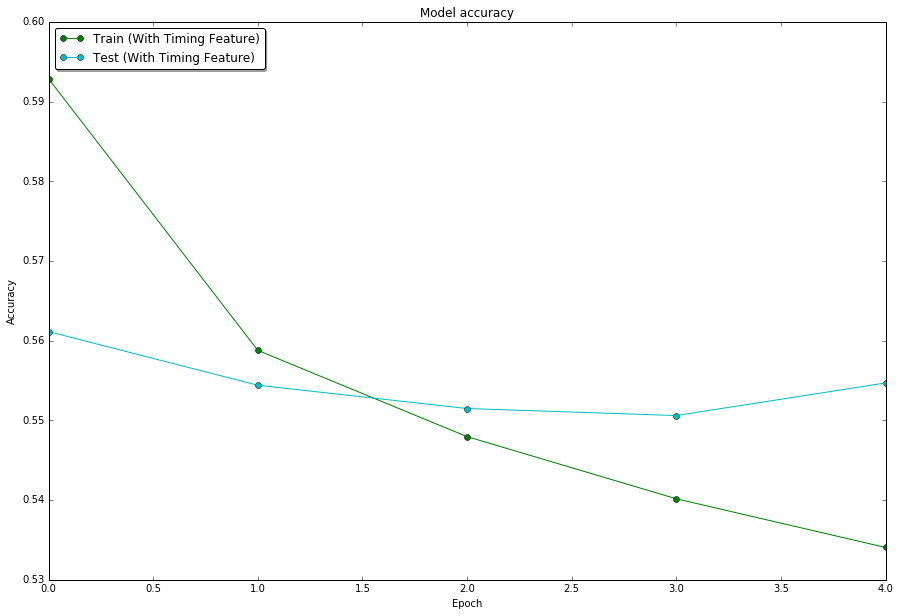

In [47]:
# Plot training & validation accuracy values
plt.subplots(figsize=(15,10))
# plt.axis([0,5,0.66,0.72])
plt.plot(history.history['main_out_loss'],'-og')
plt.plot(history.history['val_main_out_loss'],'-oc')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train (With Timing Feature)', 'Test (With Timing Feature)'], loc='upper left', fancybox=1,shadow=1)
plt.show()

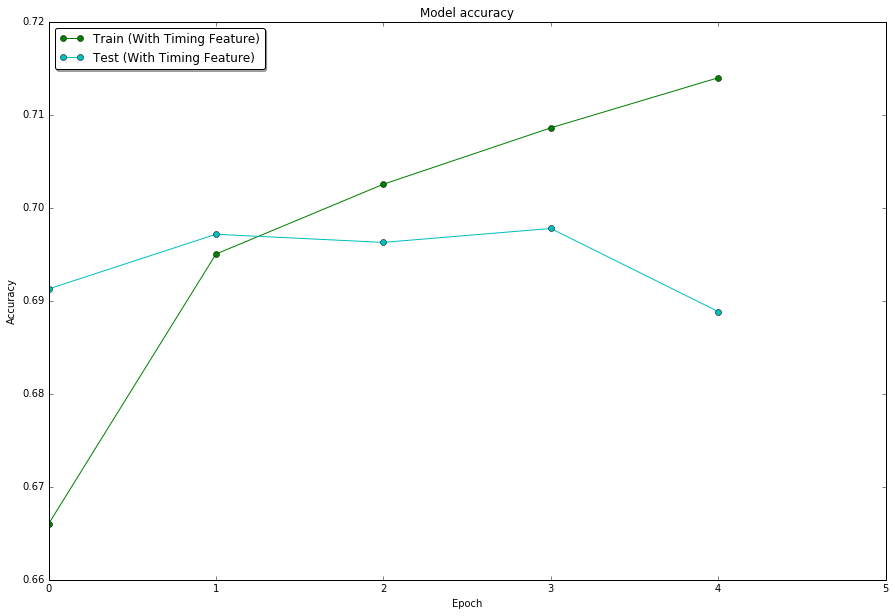

In [36]:
# Plot training & validation accuracy values
plt.subplots(figsize=(15,10))
plt.axis([0,5,0.66,0.72])
plt.plot(history.history['main_out_acc'],'-og')
plt.plot(history.history['val_main_out_acc'],'-oc')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train (With Timing Feature)', 'Test (With Timing Feature)'], loc='upper left', fancybox=1,shadow=1)
plt.show()


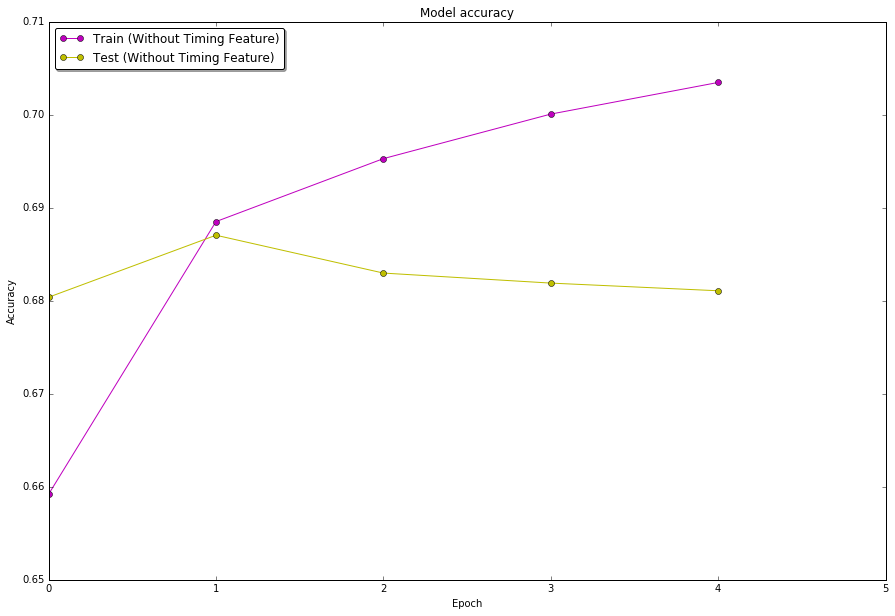

In [37]:
# Plot training & validation accuracy values
fig, ax = plt.subplots(figsize=(15,10))
plt.axis([0,5,0.65,0.71])
plt.plot(history.history['aux_out_acc'],'-om')
plt.plot(history.history['val_aux_out_acc'],'-oy')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train (Without Timing Feature)', 'Test (Without Timing Feature)'], loc='upper left', fancybox=1,shadow=1)
plt.show()

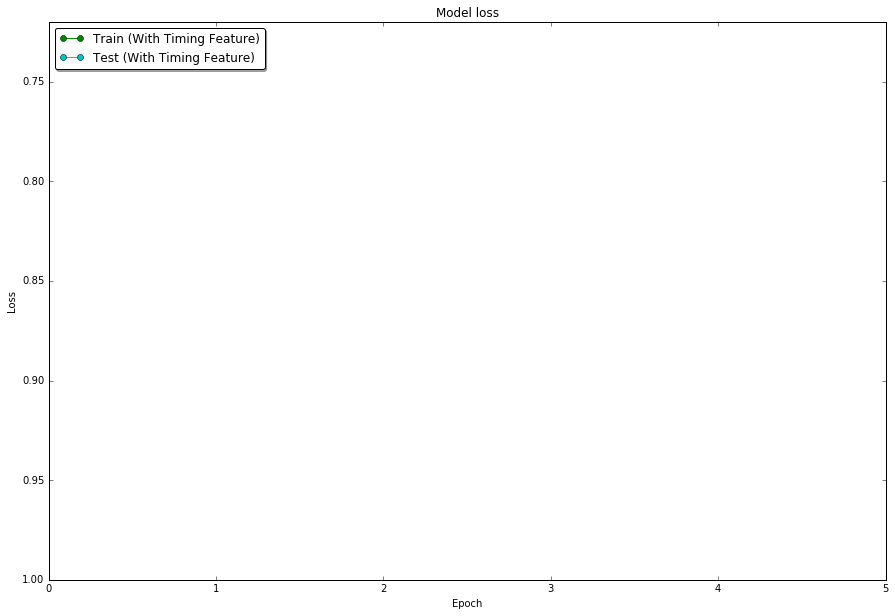

In [41]:
# Plot training & validation loss values
plt.subplots(figsize=(15,10))
plt.axis([0,5,1.00,0.72])
plt.plot(history.history['aux_out_acc'],'-og')
plt.plot(history.history['val_main_out_loss'],'-oc')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train (With Timing Feature)', 'Test (With Timing Feature)'], loc='upper left', fancybox=1,shadow=1)
plt.show()

In [29]:
#model.save_weights('weights.h5')

In [96]:
model.load_weights('weights.h5')

In [97]:
def encode_text(text, maxlen):
    encoded = word_tokenizer.texts_to_sequences([text])
    return sequence.pad_sequences(encoded, maxlen=maxlen)

In [98]:
input_text = "Which movie's plot would drastically change if you removed a letter from its title?"
encoded_text = encode_text(input_text, maxlen)
print(encoded_text)

[[   0    0    0    0    0    0   70 8018 1016   19 2520  137   21    1
  1805    5 1458   46  296  707]]


In [99]:
input_hour = np.array([15])
input_minute = np.array([10])
input_dayofweek = np.array([1])
input_dayofyear = np.array([16 - 1])

model.predict([encoded_text, input_hour, input_dayofweek, input_minute, input_dayofyear])

[array([[0.70947933]], dtype=float32), array([[0.6414327]], dtype=float32)]

In [100]:
import nltk
# nltk.download()

## Grammar Checker

In [135]:
import language_check
def correctText(input_text):
    tool = language_check.LanguageTool('en-US')
    matches = tool.check(input_text)
    len(matches)
    return language_check.correct(input_text, matches).replace("geddit", "reddit")

# Input Text

In [118]:
input_text = "What is your favorite movie?"

In [119]:
def inputText(input_text):
    tokens = nltk.word_tokenize(input_text)
    pos = nltk.pos_tag(tokens)
    #print(pos)

    word_list = input_text.split(" ")

    encoded_text = encode_text(input_text, maxlen)
    predict_score_B = model.predict([encoded_text, input_hour, input_dayofweek, input_minute, input_dayofyear])
    print(input_text,predict_score_B[0][0][0])
    return word_list,pos,predict_score_B

In [120]:
def getSentenceAndScore(input_text):
    tokens = nltk.word_tokenize(input_text)
    pos = nltk.pos_tag(tokens)
    #print(pos)

    word_list = input_text.split(" ")

    encoded_text = encode_text(input_text, maxlen)
    predict_score_B = model.predict([encoded_text, input_hour, input_dayofweek, input_minute, input_dayofyear])
    #print(input_text,predict_score_B[0][0][0])
    return word_list,predict_score_B[0][0][0]

In [121]:
word_list,pos,predict_score_B = inputText("What is that one thing that puts you off a person?")

What is that one thing that puts you off a person? 0.7253854


# Delete a word

In [122]:
def deleteWord(word_list):
    temp_list = word_list[:]
    final_text = []
    score_list = []
    dummy_text, max_score = getSentenceAndScore(" ".join(str(e) for e in temp_list))
    for i in range(len(word_list)):
        temp_list = word_list[:]
        if(pos[i][1]=='JJ' or pos[i][1]=='JJR' or pos[i][1]=='JJS' or pos[i][1]=='RB' or pos[i][1]=='RBR' or pos[i][1]=='RBS'):
            if(i != 0 and i != len(word_list)-1 ): # probably not gonna remove first word and last word
                del temp_list[i]
                temp_text = " ".join(temp_list)
                encoded_text,predict_score = getSentenceAndScore(" ".join(str(e) for e in temp_list))
#                 print(temp_list,predict_score[1][0])

                if (max_score - predict_score < 0):
                    max_score = predict_score
                    final_text.append(temp_text)
                    score_list.append(max_score)
    word_BeforeChange = " ".join(word_list)
    print("Delete a word:")
    #print("Before Chanege : ",word_BeforeChange, "[", predict_score_B[0][0][0], "]")
    #print("After Change:")
    for i in range(0,len(final_text)):
        print(correctText(final_text[i]), "[", score_list[i],"]")
    print('-----------------------')

In [123]:
deleteWord(word_list)

Delete a word:
-----------------------


In [124]:
from nltk.corpus import wordnet

def synonym(word):
    synonyms = []
    for syn in wordnet.synsets(word):
        for lm in syn.lemmas():
            synonyms.append(lm.name())
    return list(set(synonyms))

In [125]:
synonym('legal')

['effectual', 'sound', 'legal']

# Replace a word with a synonym word

In [126]:
exception_words = ["Do","do","does","did","is","am","are","was","were","has","have","had","can","could","shall","should","will","would","may","might","must","not"]
def replaceWord(word_list):
    temp_list = word_list[:]
    final_text = []
    score_list = []
    dummy_text, max_score = getSentenceAndScore(" ".join(str(e) for e in temp_list))
    max_score = int(0)
    # tool = grammar_check.LanguageTool('en-GB')
    for i in range(len(word_list)):
        syno = synonym(temp_list[i])
        possyn = nltk.pos_tag(syno)
    #     print(possyn)
        for j in range(len(syno)):
#             print(exception_words)
            if(temp_list[i].lower() not in exception_words and pos[i][1] == possyn[j][1]): 
#                 print(temp_list[i]+"+++++")
                temp_list = word_list[:]
                temp_list[i] = syno[j]
                encoded_text,predict_score = getSentenceAndScore(" ".join(str(e) for e in temp_list))
                temp_text = " ".join(temp_list)
#                 print(temp_text,predict_score[1][0])
    #             res = client.check(temp_text)
    #             matches = tool.check(temp_text)
    #             print("gramma check matches:",len(res.matches))

                if (max_score - predict_score < 0):
                    max_score = predict_score
                    final_text.append(temp_text)
                    score_list.append(max_score)

    word_BeforeChange = " ".join(word_list)
    print("Replace a word:")
    #print("Before Change : ",word_BeforeChange, "[", predict_score_B[0][0][0],"]")
    #print("After Change:")
    for i in range(0,len(final_text)):
        print(correctText(final_text[i]), "[", score_list[i],"]")
    print('-----------------------')

In [127]:
replaceWord(word_list)

Replace a word:
What is that one thing that puts you off a person? [ 0.7253854 ]
-----------------------


In [128]:
import nltk.collocations
import nltk.corpus
import collections

bgm    = nltk.collocations.BigramAssocMeasures()
finder = nltk.collocations.BigramCollocationFinder.from_words(nltk.corpus.brown.words())
scored = finder.score_ngrams( bgm.likelihood_ratio  )

# Group bigrams by first word in bigram.                                        
suffix_keys = collections.defaultdict(list)
for key, scores in scored:
   suffix_keys[key[1]].append((key[0], scores))

# Sort keyed bigrams by strongest association.                                  
for key in suffix_keys:
   suffix_keys[key].sort(key = lambda x: -x[1])

# Add a word

In [129]:
def addWord(word_list):
    temp_list = word_list[:]
    final_text = []
    score_list = []
    dummy_text, max_score = getSentenceAndScore(" ".join(str(e) for e in temp_list))
    # tool = grammar_check.LanguageTool('en-GB')
    for i in range(len(word_list)):
        if(pos[i][1]=='NN' or pos[i][1]=='NNS' or pos[i][1]=='NNP' or pos[i][1]=='NNPS' 
           or pos[i][1]=='JJ' or pos[i][1]=='JJR' or pos[i][1]=='JJS' 
           or pos[i][1]=='VB' or pos[i][1]=='VBD' or pos[i][1]=='VBG' or pos[i][1]=='VBN'):
            if(pos[i-1][1]!='JJ' and pos[i-1][1]!='JJR' and pos[i-1][1]!='JJS' and pos[i-1][1]!='RB' and pos[i-1][1]!='RBR' and pos[i-1][1]!='RBS'):
                prefix_list = []
                for word in suffix_keys[temp_list[i]]:
                    prefix_list.append(word[0])
                pos_prefix = nltk.pos_tag(prefix_list)
                prefix_list_select = []
                for j in range(len(pos_prefix)):
                    if(pos_prefix[j][1]=='JJ' or pos_prefix[j][1]=='JJR' or pos_prefix[j][1]=='JJS' or pos_prefix[j][1]=='RB' or pos_prefix[j][1]=='RBR' or pos_prefix[j][1]=='RBS'):
                        prefix_list_select.append(pos_prefix[j])
                for prefix in prefix_list_select:
                    temp_list.insert(i,prefix[0])
                    encoded_text,predict_score = getSentenceAndScore(" ".join(str(e) for e in temp_list))
                    temp_text = " ".join(temp_list)
                    temp_list = word_list[:]
#                     print(temp_text,predict_score[1][0])
                    if (max_score - predict_score < 0):
                        max_score = predict_score
                        final_text.append(temp_text)
                        score_list.append(max_score)

    word_BeforeChange = " ".join(word_list)
    print("Add a word:")
    #print("Before Change : ",word_BeforeChange, "[", predict_score_B[0][0][0],"]")
    #print("After Change:")
    for i in range(0,len(final_text)):
        print(correctText(final_text[i]), "[", score_list[i],"]")
    print('-----------------------')

In [130]:
addWord(word_list)

Add a word:
What is that one first thing that puts you off a person? [ 0.7343617 ]
What is that one nicest thing that puts you off a person? [ 0.763986 ]
What is that one wonderful thing that puts you off a person? [ 0.7844534 ]
-----------------------


In [136]:
word_list,pos,predict_score_B = inputText("Teachers of reddit, what is the craziest thing you’ve seen a parent do? 0.5990722")
deleteWord(word_list)
replaceWord(word_list)
addWord(word_list)

Teachers of reddit, what is the craziest thing you’ve seen a parent do? 0.5990722 0.5694267
Delete a word:
-----------------------
Replace a word:
Teachers of reddit, what is the craziest thing you’ve image a parent do? 0.5990722 [ 0.56482303 ]
Teachers of reddit, what is the craziest thing you’ve watch a parent do? 0.5990722 [ 0.5756064 ]
Teachers of reddit, what is the craziest thing you’ve visit a parent do? 0.5990722 [ 0.6251324 ]
Teachers of reddit, what is the craziest thing you’ve regard a parent do? 0.5990722 [ 0.62902373 ]
-----------------------
Add a word:
Teachers of reddit, what is the craziest first thing you’ve seen a parent do? 0.5990722 [ 0.5800666 ]
Teachers of reddit, what is the craziest nicest thing you’ve seen a parent do? 0.5990722 [ 0.610781 ]
Teachers of reddit, what is the craziest wonderful thing you’ve seen a parent do? 0.5990722 [ 0.6425798 ]
Teachers of reddit, what is the craziest unexpected thing you’ve seen a parent do? 0.5990722 [ 0.64475036 ]
Teachers

In [163]:
t = 0
for title in s_titles:
    if(len(title)<=20):
        word_list,pos,predict_score_B = inputText(title)
        addWord(word_list)
        deleteWord(word_list)
        replaceWord(word_list)
        t += 1
    if(t>200):
        break

What is jail like? 0.51174223
is NN
Add a word:
What is actual jail like? [ 0.55434304 ]
-----------------------
Delete a word:
-----------------------
Replace a word:
What is poky like? [ 0.4920672 ]
What is pokey like? [ 0.584987 ]
What is put_away like? [ 0.603563 ]
-----------------------
What makes you cry? 0.6764521
Add a word:
-----------------------
Delete a word:
-----------------------
Replace a word:
-----------------------
What is your talent? 0.686175
Add a word:
-----------------------
Delete a word:
-----------------------
Replace a word:
-----------------------
Why are you single? 0.60058564
Add a word:
-----------------------
Delete a word:
-----------------------
Replace a word:
Why are you single? [ 0.60058564 ]
-----------------------
Why are you exist? 0.5697456
Add a word:
-----------------------
Delete a word:
-----------------------
Replace a word:
Why are you exist? [ 0.5697456 ]
-----------------------
What is your fetish? 0.59939486
Add a word:
--------------